# MNIST Dataset
- This is probably one of the most popular datasets among machine learning and deep learning enthusiasts. 
- The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. 
- The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.

# Import necessary libraries
- First, we are going to import all the modules that we are going to need for training our model.

In [29]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Import dataset
- The Keras library already contains some datasets and MNIST is one of them. So we can easily import the dataset and start working with it. 
- The mnist.load_data() method returns us the training data, its labels and also the testing data and its labels.

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape:",x_train.shape,"|", " y_train shape:",y_train.shape,"|", " x_test shape:",x_test.shape,"|", " y_test shape:",y_test.shape)

x_train shape: (60000, 28, 28) |  y_train shape: (60000,) |  x_test shape: (10000, 28, 28) |  y_test shape: (10000,)


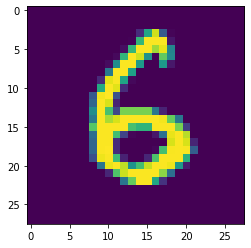

In [18]:
plt.imshow(x_train[106])

In [19]:
y_train[106]

6

# Preprocessing of the data
- The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network. 
- The dimension of the training data is (60000,28,28). 
- The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).

In [20]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
print("x_train shape:",x_train.shape,"|", " x_test shape:",x_test.shape)

x_train shape: (60000, 28, 28, 1) |  x_test shape: (10000, 28, 28, 1)


In [21]:
print("y_train classes:",set(y_train),"||","y_test classes:",set(y_test))

y_train classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} || y_test classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## One Hot Encoding

- After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0

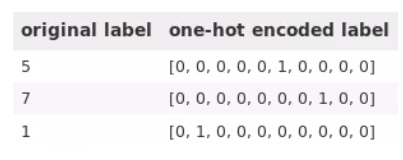

In [23]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [25]:
y_train.shape

(60000, 10)

## Normalizing the data

In [26]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'testing samples')

x_train shape: (60000, 28, 28, 1)
60000 training samples
10000 testing samples


We are ready to build a model

# Create the model
- Now we will create our CNN model. A CNN model generally consists of convolutional and pooling layers. 
- It works better for data that are represented as grid structures, this is the reason why CNN works well for image classification problems.

In [30]:
batch_size = 128
num_classes = 10
kernel_size=(3, 3)
pool_size = (2, 2)
epochs = 10
input_shape = (28,28,1)

model = Sequential()
model.add(Conv2D(32, kernel_size=kernel_size, activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))

model.add(MaxPooling2D(pool_size=pool_size))
model.add(Conv2D(64, kernel_size=kernel_size, activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, kernel_size=kernel_size, activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

## Compile the model

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

## Fit the model

In [32]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10
469/469 [==============================] - 33s 70ms/step - loss: 0.2013 - accuracy: 0.9356 - val_loss: 0.0836 - val_accuracy: 0.9740
Epoch 2/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0607 - accuracy: 0.9808 - val_loss: 0.0468 - val_accuracy: 0.9857
Epoch 3/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0418 - accuracy: 0.9869 - val_loss: 0.0481 - val_accuracy: 0.9832
Epoch 4/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0338 - val_accuracy: 0.9883
Epoch 5/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0343 - val_accuracy: 0.9880
Epoch 6/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0346 - val_accuracy: 0.9883
Epoch 7/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0175 - accuracy: 0.9950 - val_loss: 0.0340 - val_accuracy:

## Save the model

In [34]:
model.save('SGD_mnist.h5')
print("The model is saved as SGD_mnist.h5")

The model is saved as SGD_mnist.h5


## Evaluate the model

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03263240307569504
Test accuracy: 0.989799976348877


## Plot graph

In [36]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

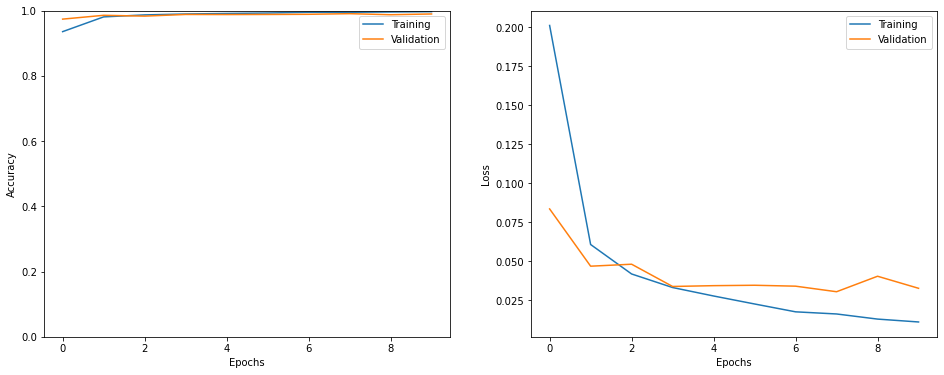

In [37]:
show_history(hist)

# Prediction on other image

In [67]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# Preprocessing the input image data
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    
    # convert to array
    img = img_to_array(img)
    
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    
    return img


# Importing image and importing saved model
def run_example():
    # load the image
    img = load_image('sample_image.png')
    
    # load model
    model = load_model('SGD_mnist.h5')
    
    # predict the class
    predict_value = model.predict(img)
    digit = np.argmax(predict_value)
    print(digit)

In [68]:
# Run the example
run_example()

7


- sample_image.png:

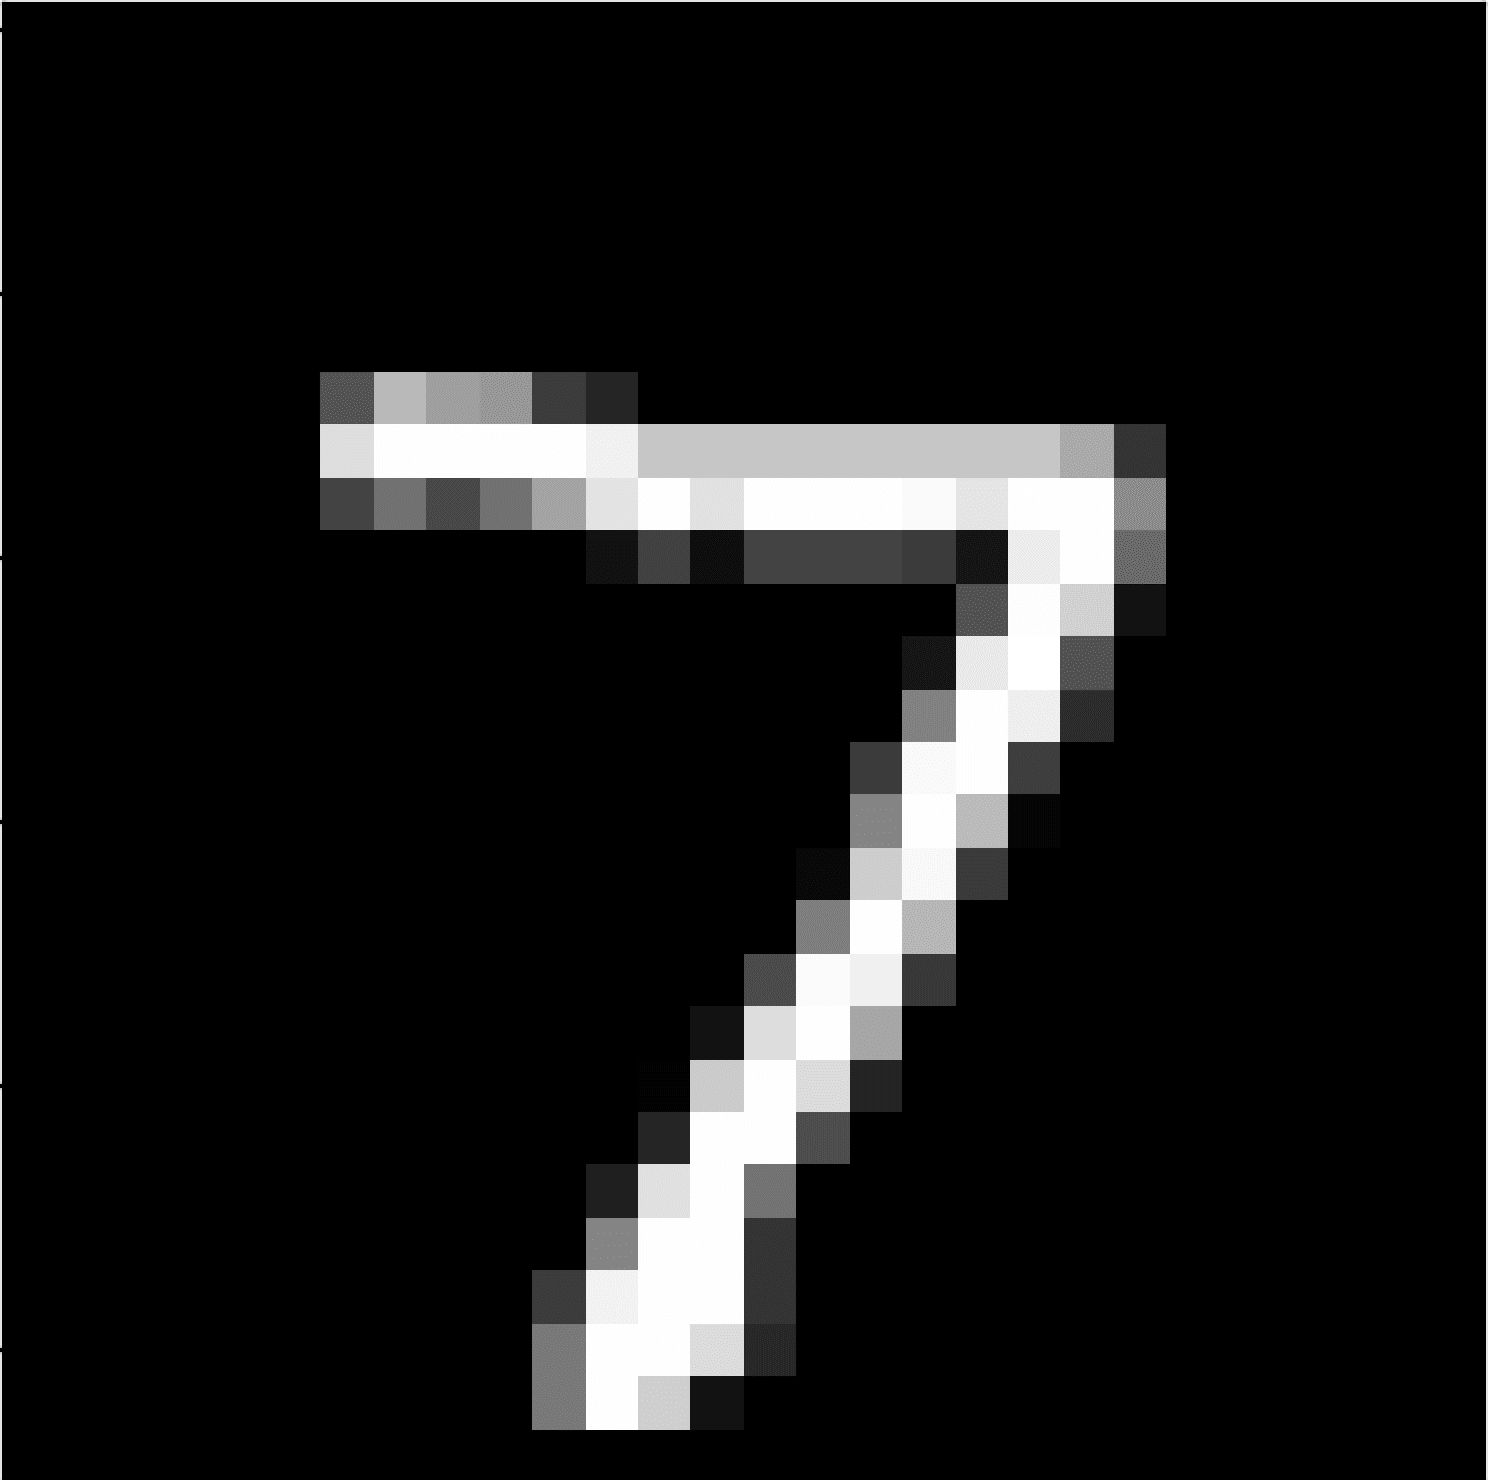

- Our model predict correctly!